# Análise de dados de RH


### Objetivo da Análise:

Realizar um trabalho de análise nos dados, compreender como estão organizados, realizar limpeza e transformação dos dados conforme necessário, detectar eventuais padrões e diagnósticos e ao final emitir um parecer com um resumo sobre os dados.

### Fonte de Dados:

Foi usado como fonte de dados o dataset disponível para download no link abaixo.

https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists

Este conjunto de dados foi desenvolvido para entender os fatores que levam uma pessoa a deixar o emprego atual. O objetivo do dataset é exatamente fazer pesquisas de RH.

### Dicionários de Dados:

Features

enrollee_id : ID exclusivo para candidato

city: Código da cidade

city_ development _index : Índice de desenvolvimento da cidade (escala)

gender: Gênero do candidato

relevent_experience: Experiência relevante do candidato

enrolled_university: Tipo de curso universitário matriculado, se houver

education_level: Nível de escolaridade do candidato

major_discipline : Educação disciplina principal do candidato

experience: Experiência total do candidato em anos

company_size: Nº de funcionários na empresa do empregador atual

company_type : Tipo de empregador atual

lastnewjob: Diferença de anos entre o emprego anterior e o atual

training_hours: horas de treinamento concluídas

target: 0 – Não procura mudança de emprego, 1 – Procura uma mudança de emprego


## Instalando e Carregando os Pacotes

In [1]:
!pip install -q -U watermark

In [2]:
!pip install -q missingno

In [3]:
!pip install -q category_encoders

In [4]:
!pip install -q plotly

In [5]:
# Imports

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno

# Estatística
import scipy
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# Engenharia de Atributos
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [6]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Frederico" --iversions

Author: Frederico

seaborn          : 0.11.2
plotly           : 5.6.0
scipy            : 1.7.3
numpy            : 1.21.5
sys              : 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
category_encoders: 2.5.0
pandas           : 1.4.2
missingno        : 0.5.1
matplotlib       : 3.5.1



## Caregando os dados

In [7]:
# carrega o dataset

df = pd.read_csv('dataset/aug_train.csv')

In [8]:
# tamanho do dataset
# coluna = variavel, feature, atributos

print(f'Esse dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas.')

Esse dataset tem 19158 linhas e 14 colunas.


In [9]:
# colunas

df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [10]:
# verificando as primeiras linhas do dataset

df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [11]:
# info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

## Análise Exploratória de Dados

In [12]:
# Descrevendo os dados não numéricos (categoricos)

df.describe(include=object)

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [13]:
# descrevendo os dados númericos

df.describe().drop(columns=['enrollee_id','target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


* Em **city_development_index** (CDI), os valores médios são 0,828, mediana 0,903 e std 0,123. Isso significa que a maioria dos candidatos é de cidades bem desenvolvidas.


* Em **training_hours**, os valores médios são 65,367, mediana 47 e max 336. Isso significa que há mais candidatos com poucas horas de treinamento, mas alguns candidatos gastam muito tempo para fazer o treinamento.

### Visualizando as Variáveis Categóricas

In [14]:
list(df.columns.values)[3:12]


['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

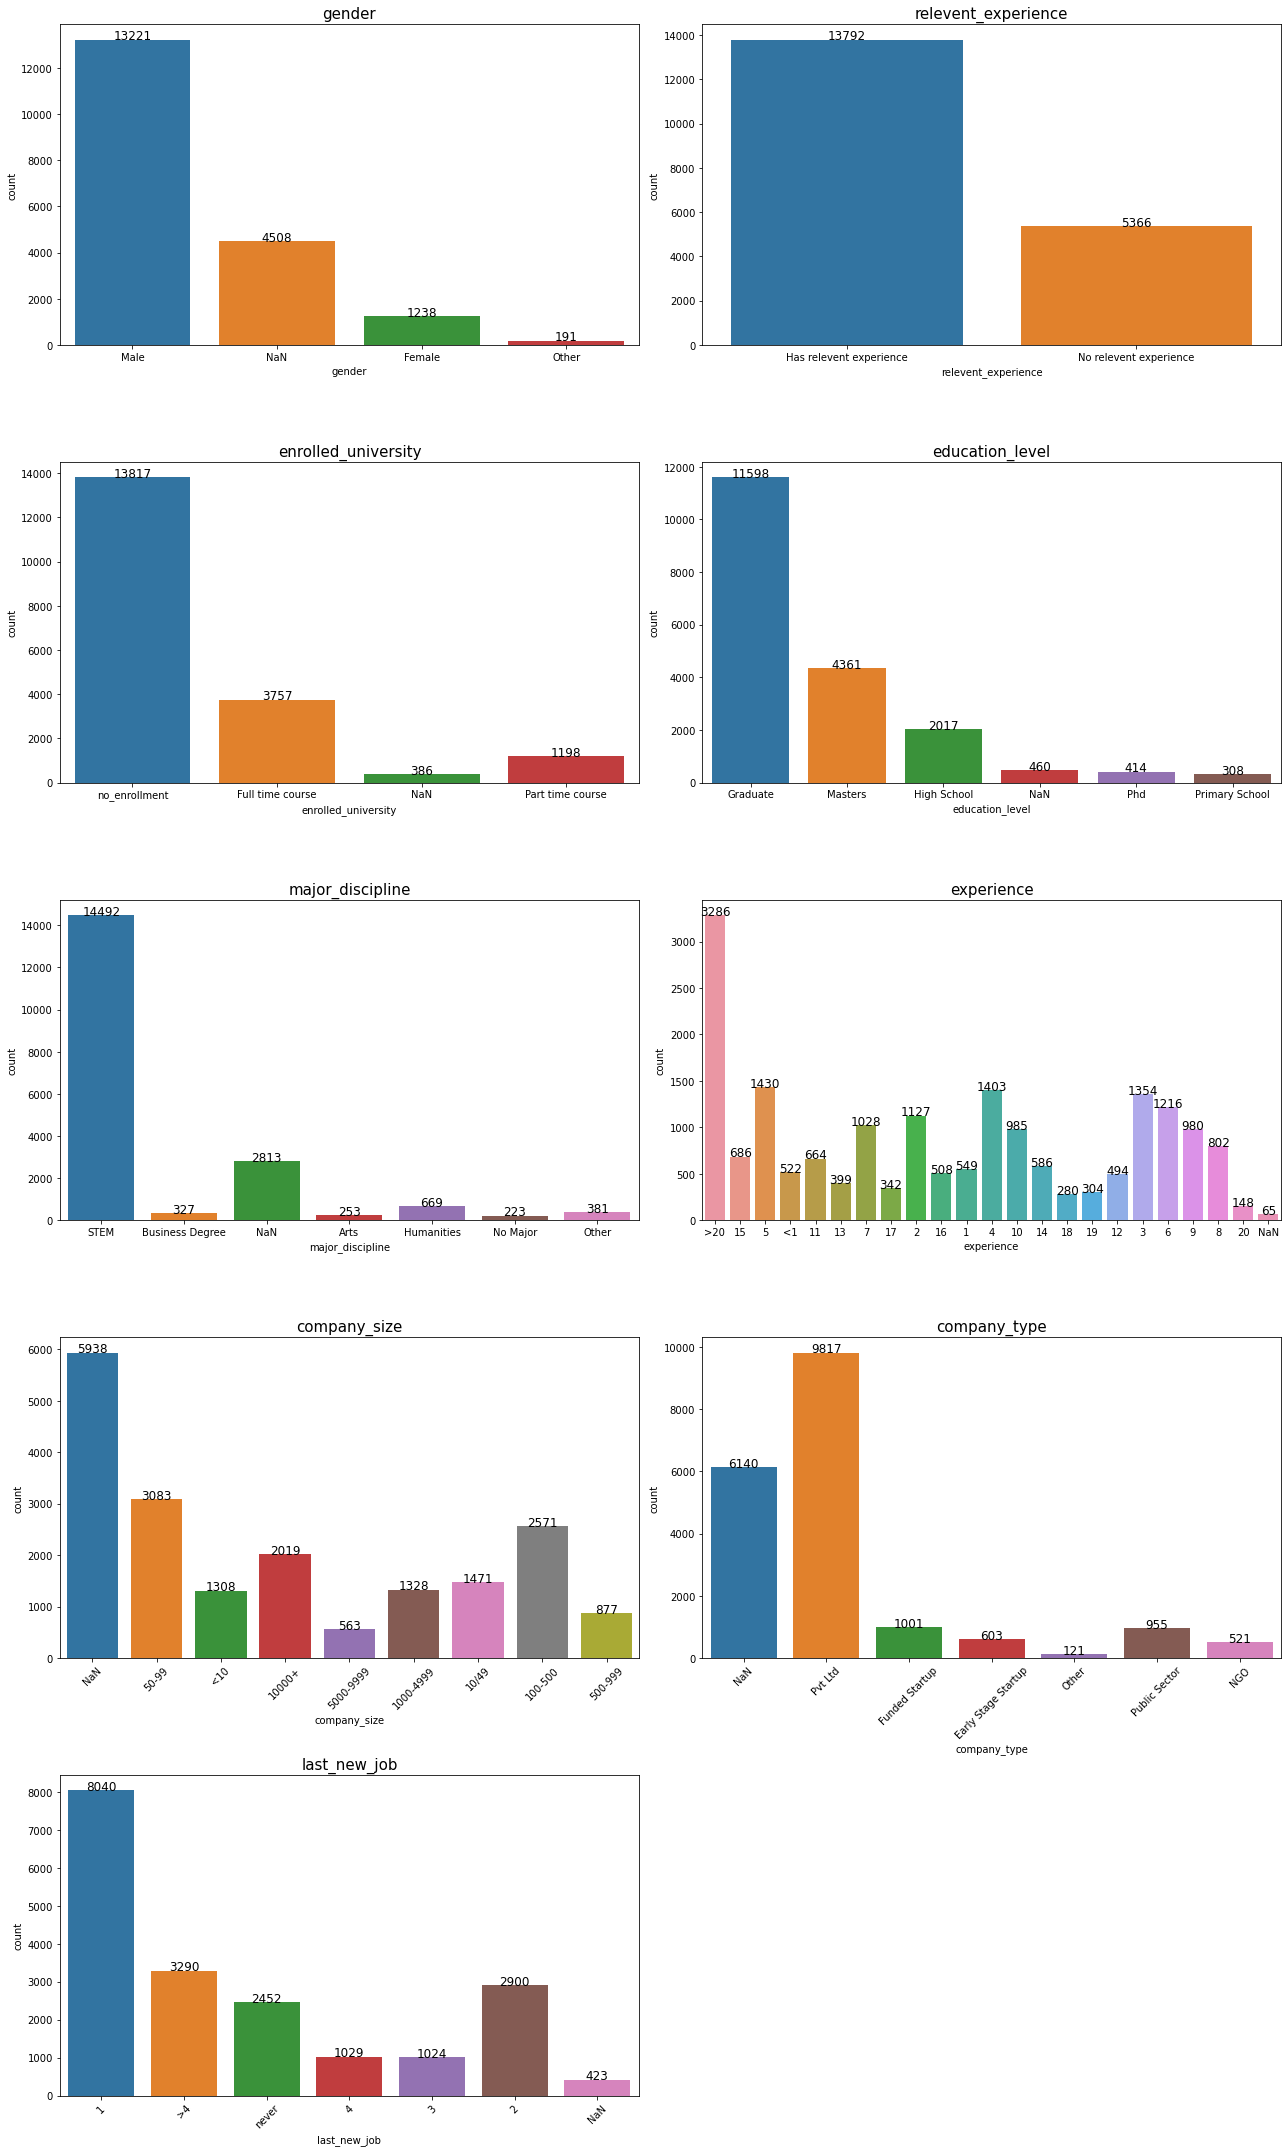

In [15]:
# Plot

# Tamanho da figura
plt.figure(figsize = (18,30))

# Lista de colunas
column_list = list(df.columns.values)[3:12]

# Contador
A = 0

# Loop
for i in column_list:
    A += 1
    plt.subplot(5, 2, A)
    ax = sns.countplot(data = df.fillna('NaN'), x = i)
    plt.title(i, fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
    if A >= 7:
        plt.xticks(rotation = 45)

# Layout
plt.tight_layout(h_pad = 2)

### Verificando a Distribuição das Variáveis Numéricas

In [16]:
# Descrevendo os dados numéricos
df.describe().drop(columns = ['enrollee_id', 'target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


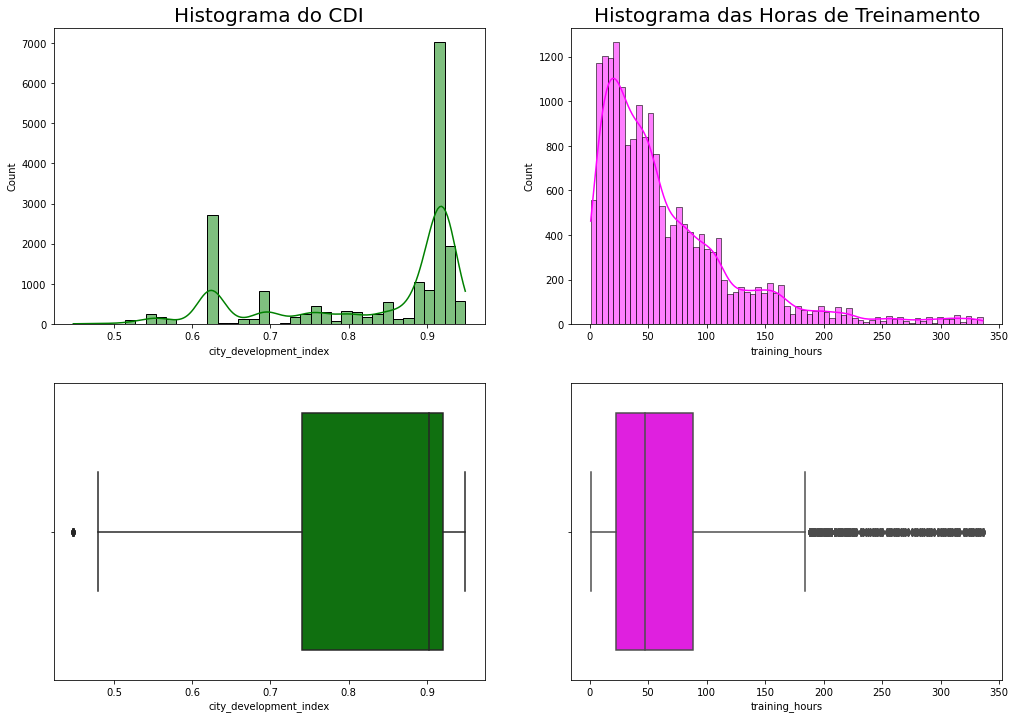

In [17]:
# Figura
plt.figure(figsize = (17,12))

# Subplots com histogramas
plt.subplot(221)
sns.color_palette("hls", 8)
sns.histplot(df['city_development_index'], kde = True, color = "green")
plt.title('Histograma do CDI', fontsize = 20)

plt.subplot(222)
sns.histplot(df['training_hours'], kde = True, color = "magenta")
plt.title('Histograma das Horas de Treinamento', fontsize = 20)

# Subplots com boxplots
plt.subplot(223)
sns.boxplot(df['city_development_index'], color = "green")

plt.subplot(224)
sns.boxplot(df['training_hours'], color = "magenta")

plt.show()

In [18]:
# verificando quais são os valores outliers
# intervalo interquartil (IQR )

Q1 = np.percentile(df['city_development_index'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['city_development_index'], 75,
                   interpolation = 'midpoint')
IQR = round(Q3 - Q1,2)

limite_inferior = round((Q1-1.5*IQR),2)

limite_superior = round((Q3+1.5*IQR),2)

print(f'O intervalo interquartil é: {IQR}, o limite inferior é {limite_inferior} e o limite superior é {limite_superior}')

O intervalo interquartil é: 0.18, o limite inferior é 0.47 e o limite superior é 1.19


In [19]:
# filtrando na base os valores discrepantes
# por esse calculo só temos valores outliers abaixo do limite inferior

print(f"Quatidade de valores abaixo do limite inferior {df.query('city_development_index < 0.47')['enrollee_id'].count()}")

print(f"Quatidade de valores abaixo do limite inferior {df.query('city_development_index > 1.19')['enrollee_id'].count()}")

Quatidade de valores abaixo do limite inferior 17
Quatidade de valores abaixo do limite inferior 0


In [20]:
df.query('city_development_index < 0.47')

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1523,8238,city_33,0.448,NaN,Has relevent experience,Part time course,Graduate,STEM,10,50-99,NGO,>4,48,1.0
4744,30985,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,2,NaN,NaN,never,43,1.0
5010,27970,city_33,0.448,Male,No relevent experience,no_enrollment,Graduate,STEM,1,NaN,NaN,never,73,1.0
5265,31194,city_33,0.448,NaN,No relevent experience,NaN,High School,NaN,5,NaN,Pvt Ltd,never,86,1.0
5567,598,city_33,0.448,NaN,Has relevent experience,Part time course,Masters,STEM,6,NaN,NaN,1,18,1.0
6127,18564,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,4,NaN,Public Sector,4,32,1.0
7724,31179,city_33,0.448,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,28,0.0
7864,26838,city_33,0.448,Male,Has relevent experience,no_enrollment,Graduate,STEM,8,NaN,NaN,>4,74,0.0
9134,4858,city_33,0.448,NaN,No relevent experience,Part time course,Masters,Other,2,<10,NGO,1,23,1.0
10401,19463,city_33,0.448,Male,No relevent experience,no_enrollment,Graduate,STEM,5,10000+,Pvt Ltd,2,36,0.0


In [21]:
# verificando quais são os valores outliers
# intervalo interquartil (IQR )
# por esse calculo só temos valores outliers acima do limite superior

Q1 = np.percentile(df['training_hours'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['training_hours'], 75,
                   interpolation = 'midpoint')
IQR = round(Q3 - Q1,2)

limite_inferior = round((Q1-1.5*IQR),2)

limite_superior = round((Q3+1.5*IQR),2)

print(f'O intervalo interquartil é: {IQR}, o limite inferior é {limite_inferior} e o limite superior é {limite_superior}')

O intervalo interquartil é: 65.0, o limite inferior é -74.5 e o limite superior é 185.5


In [22]:
# filtrando na base os valores discrepantes
# por esse calculo só temos valores outliers acima do limite superior

print(f"Quatidade de valores abaixo do limite inferior {df.query('training_hours < -74.5')['enrollee_id'].count()}")

print(f"Quatidade de valores abaixo do limite inferior {df.query('training_hours > 185.5')['enrollee_id'].count()}")

Quatidade de valores abaixo do limite inferior 0
Quatidade de valores abaixo do limite inferior 984


In [23]:
# top 20

df.query('training_hours > 185.5').sort_values(by=['training_hours'],ascending=False)[:20]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
13929,4983,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,Humanities,5,10000+,Pvt Ltd,1,336,0.0
4794,28975,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,STEM,12,500-999,Pvt Ltd,1,336,0.0
7121,10041,city_103,0.920,NaN,No relevent experience,Full time course,Graduate,STEM,<1,NaN,NaN,2,336,1.0
2056,6410,city_160,0.920,NaN,No relevent experience,no_enrollment,Primary School,NaN,3,50-99,Pvt Ltd,1,336,0.0
13753,23680,city_145,0.555,Male,No relevent experience,no_enrollment,Masters,STEM,3,100-500,Pvt Ltd,1,336,1.0
16785,26858,city_160,0.920,Male,Has relevent experience,Part time course,Graduate,STEM,16,10/49,Early Stage Startup,2,336,0.0
4117,14332,city_19,0.682,NaN,No relevent experience,no_enrollment,Graduate,STEM,5,100-500,Pvt Ltd,1,336,0.0
4397,27795,city_103,0.920,Male,No relevent experience,no_enrollment,Primary School,NaN,6,NaN,NaN,never,336,0.0
18458,32716,city_103,0.920,NaN,Has relevent experience,no_enrollment,Phd,STEM,17,50-99,Pvt Ltd,1,336,0.0
6322,32554,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,2,10/49,Public Sector,1,336,0.0


In [24]:
# Teste de Normalidade da Distribuição

# Lista com as variáveis numéricas
numerical_feature = ['city_development_index', 'training_hours']

# Loop
for i in numerical_feature:
    
    # Calcula a normalidade
    stats, pval = normaltest(df[i])
    
     # Checar valor-p
    if pval > 0.05:
        print(i, ': Distribuição Normal')
    else:
        print(i, ': Distribuição Não Normal')

city_development_index : Distribuição Não Normal
training_hours : Distribuição Não Normal


* As variáveis **city_development_index** e **training_hours** não seguem a distribuição normal. Para a análise numérica, usaremos o método não paramétrico.


* Dados de **training_hours** estão localizados principalmente no lado esquerdo do histograma. É um comportamento esperado porque as pessoas geralmente ficam animadas ao fazer o treinamento no início, mas nem todos que começam conseguem terminar uma maratona. ;-)

### Correlação dos Dados


Analisamos a correlação entre as variáveis numéricas e entre as variáveis numéricas e a variável alvo (o que estamos querendo analisar).m

In [25]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [26]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [27]:
df_analise = df.copy()


In [28]:
df_analise["experience"].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [29]:
# Convertemos a variável experience para numérica
df_analise["experience"] = np.where(df_analise["experience"] == "<1", 1, df_analise["experience"])
df_analise["experience"] = np.where(df_analise["experience"] == ">20", 21, df_analise["experience"])
df_analise["experience"] = df_analise["experience"].astype(float)

In [30]:
df_analise["experience"].value_counts()

21.0    3286
5.0     1430
4.0     1403
3.0     1354
6.0     1216
2.0     1127
1.0     1071
7.0     1028
10.0     985
9.0      980
8.0      802
15.0     686
11.0     664
14.0     586
16.0     508
12.0     494
13.0     399
17.0     342
19.0     304
18.0     280
20.0     148
Name: experience, dtype: int64

In [31]:
df_analise["last_new_job"].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [32]:
# Convertemos a variável last_new_job para numérica
df_analise["last_new_job"] = np.where(df_analise["last_new_job"] == "never", 0, df_analise["last_new_job"])
df_analise["last_new_job"] = np.where(df_analise["last_new_job"] == ">4", 5, df_analise["last_new_job"])
df_analise["last_new_job"] = df_analise["last_new_job"].astype(float)

In [33]:
df_analise["last_new_job"].value_counts()

1.0    8040
5.0    3290
2.0    2900
0.0    2452
4.0    1029
3.0    1024
Name: last_new_job, dtype: int64

In [34]:
df_analise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  float64
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(4), int64(2), object(8)
mem

###### Correlação de Spearman

O Coeficiente de Correlação por Postos de Spearman, é uma medida não paramétrica da dependência dos postos das variáveis.

Este coeficiente também pode ser chamado de ρ (rho) de Spearman, rs de Spearman ou Correlação de Spearman. Como o nome já dá a entender, a correlação de Spearman descreve a relação entre as variáveis através de uma função monotética.

Isso significa, de maneira simplificada, que ele está analisando se, quando o valor de uma variável aumenta ou diminui, o valor da outra variável aumenta ou diminui.

Para interpretarmos esta relação, o coeficiente da correlação de Spearman gera um número que varia de -1 a +1. Quanto mais próximo dos extremos (-1 ou 1), maior é a força da correlação. Já os valores próximos de 0 implicam em correlações mais fracas ou inexistentes.

O quão próximo do zero indica o poder da relação, mas também precisamos interpretar o sinal, se é positivo ou negativo, que indica a direção desta relação. Se positiva, o aumento em uma variável implica no aumento na outra variável. Os valores negativos indicam que o aumento de uma variável implica no decréscimo de outra. Como no gráfico a seguir:


![Gráfico](https://psicometriaonline.com.br//wp-content/uploads/2021/02/image-6.png)

In [35]:
df_analise.drop(columns='enrollee_id',axis=1).corr(method='spearman')

,city_development_index,experience,last_new_job,training_hours,target
city_development_index,1.000000,0.300997,0.182698,0.007491,-0.279165
experience,0.300997,1.000000,0.473284,0.003569,-0.183721
last_new_job,0.182698,0.473284,1.000000,0.002959,-0.082045
training_hours,0.007491,0.003569,0.002959,1.000000,-0.014126
target,-0.279165,-0.183721,-0.082045,-0.014126,1.000000


In [36]:
# # Heatmap
# plt.figure(figsize = (7,7))
# mask = np.zeros_like(df_analise.drop("enrollee_id", axis = 1).corr("spearman"))
# mask[np.triu_indices_from(mask)] = True
# sns.heatmap(df_analise.drop("enrollee_id", axis = 1).corr("spearman"), annot = True, cmap = "YlGnBu",mask =mask)
# plt.title("Mapa de Correlação das Variáveis Numéricas\n", fontsize = 15)
# plt.show()

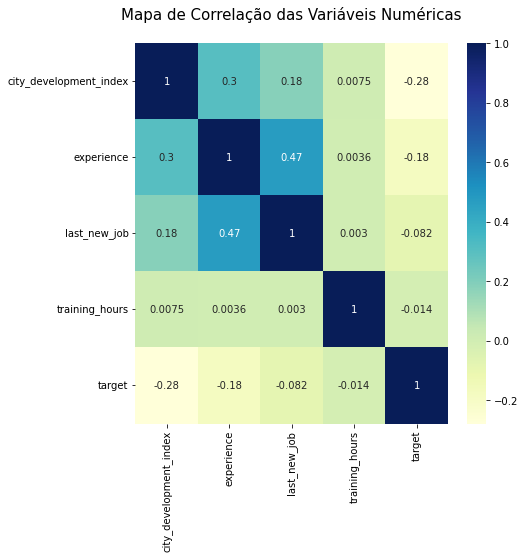

In [37]:
# Heatmap
plt.figure(figsize = (7,7))
sns.heatmap(df_analise.drop("enrollee_id", axis = 1).corr("spearman"), annot = True, cmap = "YlGnBu")
plt.title("Mapa de Correlação das Variáveis Numéricas\n", fontsize = 15)
plt.show()

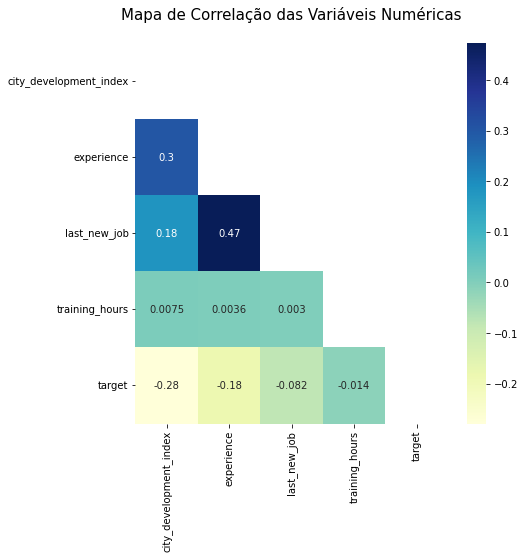

In [38]:
# Heatmap
plt.figure(figsize = (7,7))
upp_mat = np.triu(df_analise.drop("enrollee_id", axis = 1).corr("spearman"))
sns.heatmap(df_analise.drop("enrollee_id", axis = 1).corr("spearman"), annot = True, cmap = "YlGnBu",mask = upp_mat)
plt.title("Mapa de Correlação das Variáveis Numéricas\n", fontsize = 15)
plt.show()

Pela correlação de spearman, last_new_job e experience têm correlação média (0,473), enquanto outros têm correlação fraca.

As variáveis last_new_job e training_hours tem correlação próxima de zero com a variável alvo e poderiam ser descartadas.

### Weight of Evidence (WOE) e Information Value (IV)

Este conjunto de dados contém mais dados com tipo categórico do que tipo numérico. Usaremos recursos categóricos nominais para WOE e IV.

Para a relação entre as variáveis categóricas e a variável alvo, usaremos WOE e IV.

Interpretamos o resultado de IV assim:

    Information Value, Poder de Previsão
    
    < 0.02, não deve ser usado para previsão
    0.02 - 0.1, preditor fraco
    0.1 - 0.3, preditor médio
    0.3 - 0.5, preditor forte
    > 0.5, parece bom demais para ser verdade

In [39]:
# Loop
for i in df_analise.drop(columns = ['target',
                            'enrollee_id',
                            'city',
                            'city_development_index',
                            'training_hours',
                            'experience',
                            'last_new_job',
                            'company_size']).columns:
    
    df_woe_iv = (pd.crosstab(df_analise[i], df_analise['target'], normalize = 'columns')
                 .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv = lambda dfx: np.sum(dfx['woe'] * (dfx[1]-dfx[0]))))
    
    print(df_woe_iv,'\n------------------------------------------------------------')

target      0.0       1.0       woe        iv
gender                                       
Female  0.08098  0.096222  0.172452  0.003337
Male    0.90650  0.889020 -0.019471  0.003337
Other   0.01252  0.014758  0.164458  0.003337 
------------------------------------------------------------
target                        0.0       1.0       woe        iv
relevent_experience                                            
Has relevent experience  0.753147  0.619845 -0.194790  0.083523
No relevent experience   0.246853  0.380155  0.431784  0.083523 
------------------------------------------------------------
target                    0.0       1.0       woe        iv
enrolled_university                                        
Full time course     0.164754  0.307477  0.623947  0.118886
Part time course     0.063465  0.064890  0.022210  0.118886
no_enrollment        0.771781  0.627632 -0.206746  0.118886 
------------------------------------------------------------
target                0.0   

<Figure size 1440x720 with 0 Axes>

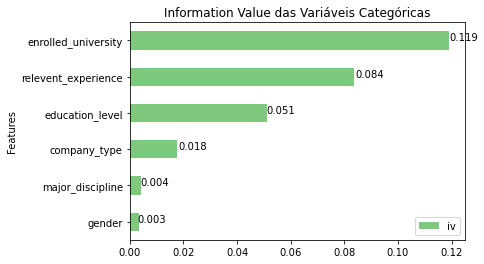

In [40]:
# Plot do Information Value

# Variáveis categóricas
columns_cat = df_analise.drop(columns = ['target',
                                 'enrollee_id',
                                 'city',
                                 'city_development_index',
                                 'training_hours',
                                 'experience',
                                 'last_new_job',
                                 'company_size']).columns

# Lista para o IV
iv = []

# Loop
for i in columns_cat:
    df_woe_iv = (pd.crosstab(df_analise[i], df_analise['target'], normalize = 'columns')
                 .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv = lambda dfx: np.sum(dfx['woe']*(dfx[1]-dfx[0]))))
    iv.append(df_woe_iv['iv'][0])

# Dataframe
df_iv = pd.DataFrame({'Features':columns_cat,'iv':iv}).set_index('Features').sort_values(by = 'iv')

# Plot
# Figura
plt.figure(figsize = (20,10))
df_iv.plot(kind = 'barh', title = 'Information Value das Variáveis Categóricas', colormap = "Accent")
for index, value in enumerate(list(round(df_iv["iv"],3))):
    plt.text((value), index, str(value))
plt.legend(loc  = "lower right")
plt.show()

* No gráfico acima, podemos ver a ordem dos recursos com base em seu poder preditivo em relação ao alvo.
* Com base em seu valor IV, `enrolled_university` é um preditor médio, `relevent_experience` e `education_level` são preditores fracos e os outros são inúteis para a previsão.

### Identificando Valores Ausentes

In [41]:
# Valores ausentes

null_df = df_analise.isnull().sum().sort_values(ascending=False).reset_index()

null_df



,index,0
0,company_type,6140
1,company_size,5938
2,gender,4508
3,major_discipline,2813
4,education_level,460
5,last_new_job,423
6,enrolled_university,386
7,experience,65
8,enrollee_id,0
9,city,0


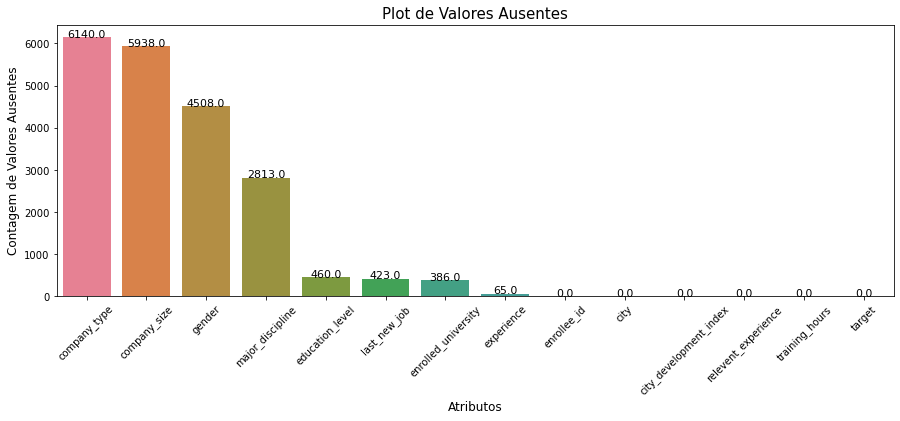

In [42]:
# Figura
ax = plt.figure(figsize = (15,5))

# Barplot
ax = sns.barplot(null_df['index'], null_df[0], palette = 'husl')
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Plot de Valores Ausentes", fontsize = 15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()

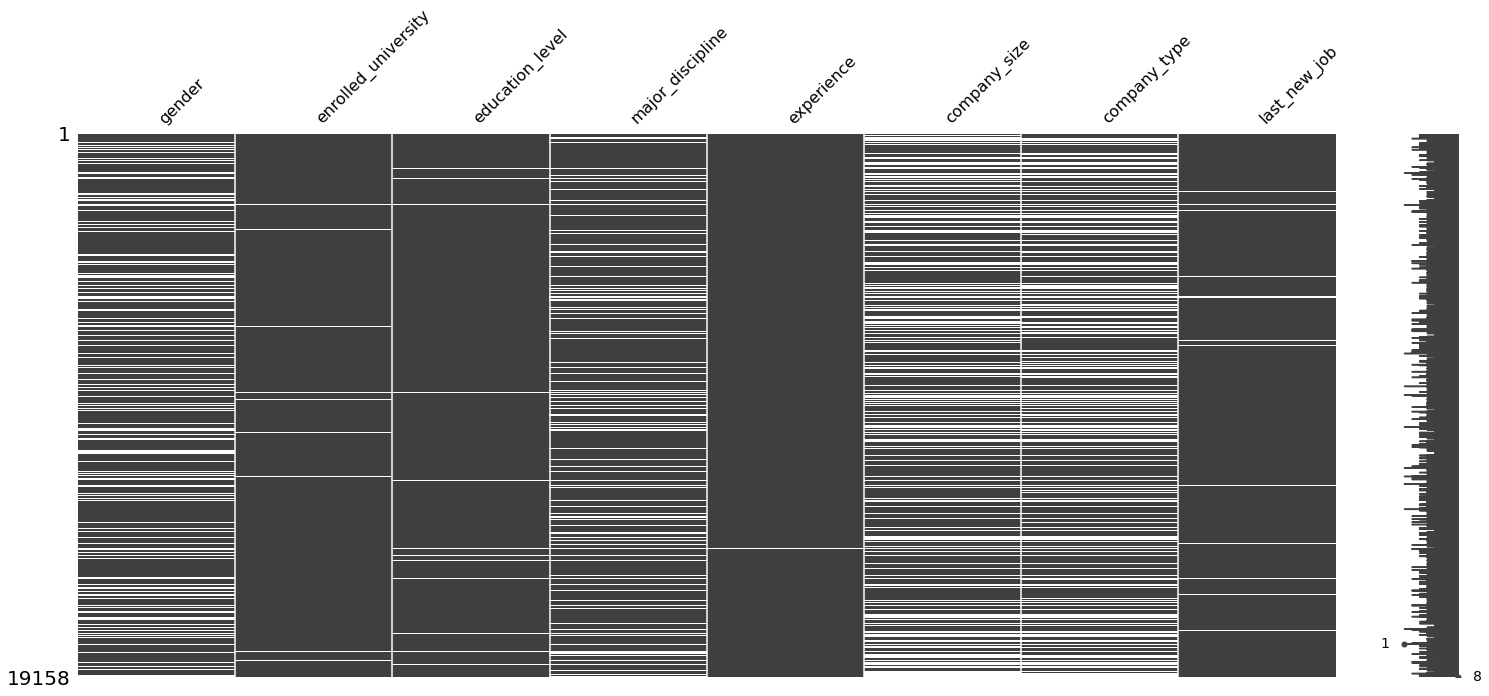

In [43]:
# Gera a visualização

# Dataframe
df_nan = pd.DataFrame(df_analise.isna().sum())

# Plot - Mapa de Valores Ausentes
if df_analise.isna().any(axis = None):
    missingno.matrix(df_analise[df_nan[df_nan[0]>0].index])
    plt.show()

Valores ausentes em cada coluna têm um padrão aleatório.

### Identificando Valores Duplicados

In [44]:
# Checando valores duplicados (não há)
df_analise['enrollee_id'].duplicated().sum()

0

### Identificando Dados Desbalanceados

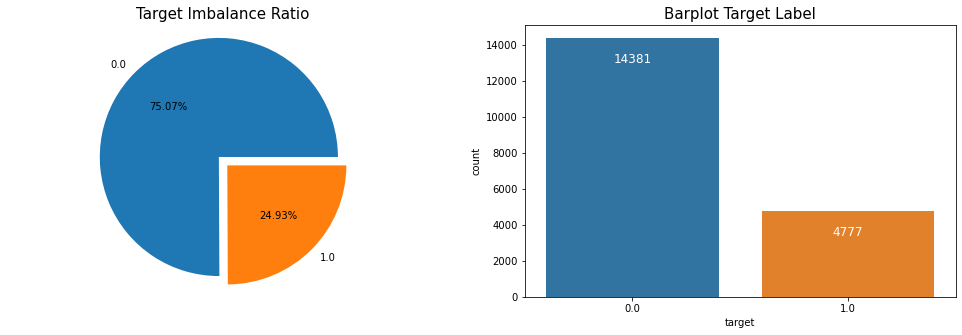

In [45]:
# Figura
plt.figure(figsize = (17,(100)/20))

plt.subplot(121)

plt.pie(round(df_analise['target'].value_counts() / len(df) * 100, 2),
        labels = list(df_analise['target'].value_counts().index),
        autopct = "%.2f%%",
        explode = (0,0.1))

plt.axis("equal")
plt.title("Target Imbalance Ratio", size = 15)

plt.subplot(122)
ax = sns.countplot(data = df_analise, x = 'target')
plt.title("Barplot Target Label", fontsize = 15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', 
                (p.get_x()+0.4, 
                 p.get_height()), 
                ha = 'center', 
                va = 'top', 
                color = 'white', 
                size = 12)

Os dados estão desbalanceados em relação à variável target.

### Tratando os Valores Ausentes

In [46]:
df_analise.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [47]:
colunas_manter = ['city_development_index', 
                  'experience', 
                  'enrolled_university', 
                  'relevent_experience', 
                  'education_level',
                  'company_type',
                  'major_discipline',
                  'target']

In [48]:
new_df = df_analise[colunas_manter]

In [49]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.920,21.0,no_enrollment,Has relevent experience,Graduate,NaN,STEM,1.0
1,0.776,15.0,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5.0,Full time course,No relevent experience,Graduate,NaN,STEM,0.0
3,0.789,1.0,NaN,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,21.0,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


In [50]:
df_analise.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,NaN,NaN,1.0,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,5.0,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,0.0,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,1.0,NaN,Pvt Ltd,0.0,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4.0,8,0.0


In [51]:
# Valores ausentes

null_df = new_df.isnull().sum().sort_values(ascending=False).reset_index()

null_df


,index,0
0,company_type,6140
1,major_discipline,2813
2,education_level,460
3,enrolled_university,386
4,experience,65
5,city_development_index,0
6,relevent_experience,0
7,target,0


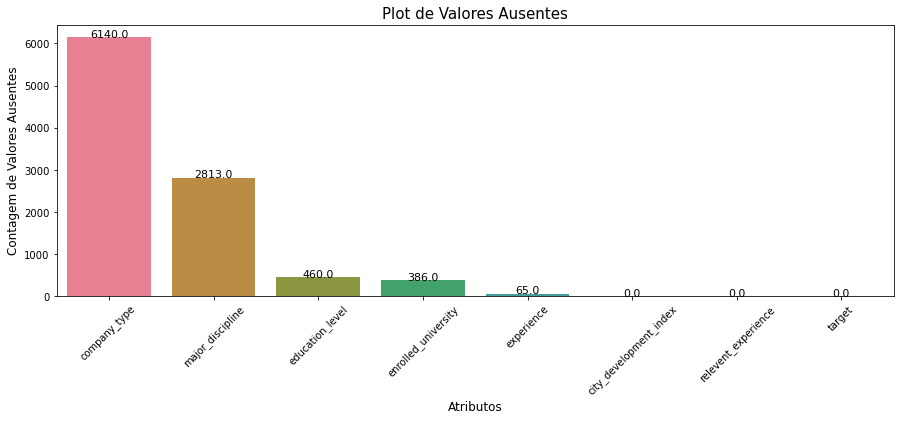

In [52]:
# Figura
ax = plt.figure(figsize = (15,5))

# Barplot
ax = sns.barplot(null_df['index'], null_df[0], palette = 'husl')
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Plot de Valores Ausentes", fontsize = 15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()

#### Variável major_discipline

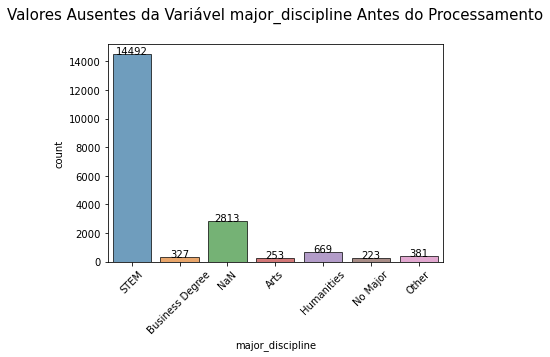

In [53]:
# Valores Ausentes da Variável major_discipline Antes do Processamento
sns.countplot(data = new_df.fillna('NaN'), x = 'major_discipline', alpha = 0.7, edgecolor = 'black')
plt.xticks(rotation = 45)
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável major_discipline Antes do Processamento\n", fontsize = 15)
plt.show()

In [54]:
# Relação entre major_discipline x education_level
print('\nTotal de Valores Ausentes na Variável major_discipline:', new_df['major_discipline'].isna().sum())
print('\nProporção de Valores Ausentes na Variável education_level:')
new_df[new_df['major_discipline'].isna()]['education_level'].value_counts(dropna = False)


Total de Valores Ausentes na Variável major_discipline: 2813

Proporção de Valores Ausentes na Variável education_level:


High School       2017
NaN                460
Primary School     308
Graduate            22
Masters              6
Name: education_level, dtype: int64

Dentre os registros com valores ausentes, vemos a proporção na variável education_level.

Preencheremos os valores NA da variável `major_discipline` com `Non Degree`.

In [55]:
# Cria o índice
nan_index = (new_df[(new_df['major_discipline'].isna()) & ((new_df['education_level']=='High School') | (new_df['education_level'].isna()) | (new_df['education_level']=='Primary School'))]).index

In [56]:
len(nan_index)

2785

In [57]:
# Imputação do valor ausente
new_df['major_discipline'][nan_index] = 'Non Degree'

In [58]:
print('Total de Valores Ausentes na Variável major_discipline:', new_df['major_discipline'].isna().sum())
new_df['major_discipline'].value_counts(dropna = False)

Total de Valores Ausentes na Variável major_discipline: 28


STEM               14492
Non Degree          2785
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
NaN                   28
Name: major_discipline, dtype: int64

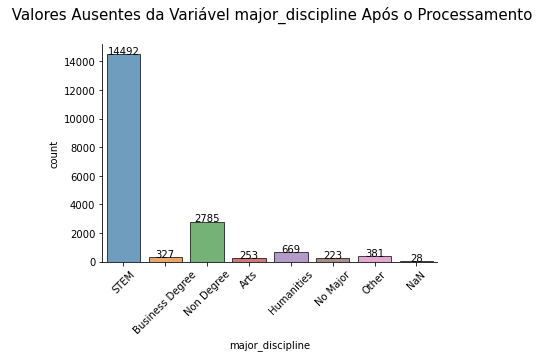

In [59]:
# Valores Ausentes da Variável major_discipline Após o Processamento
sns.countplot(data = new_df.fillna('NaN'), x = 'major_discipline', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks(rotation=45)
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title(" Valores Ausentes da Variável major_discipline Após o Processamento\n", fontsize = 15)
plt.show()

In [60]:
# Para os valores ausentes restantes preenchemos com 'Other'
new_df[new_df['major_discipline'].isna()]  = 'Other'

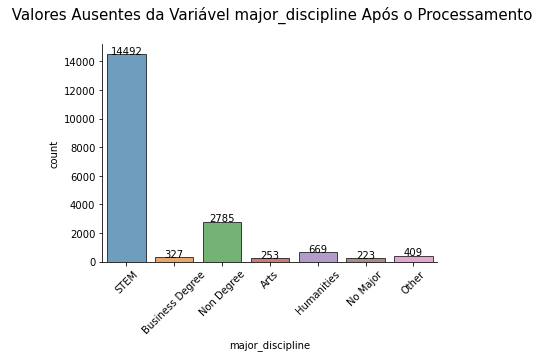

In [61]:
# Valores Ausentes da Variável major_discipline Após o Processamento
sns.countplot(data = new_df.fillna('NaN'), x = 'major_discipline', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks(rotation=45)
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title(" Valores Ausentes da Variável major_discipline Após o Processamento\n", fontsize = 15)
plt.show()

In [62]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,21.0,no_enrollment,Has relevent experience,Graduate,NaN,STEM,1.0
1,0.776,15.0,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5.0,Full time course,No relevent experience,Graduate,NaN,STEM,0.0
3,0.789,1.0,NaN,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,21.0,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


#### Variável enrolled_university

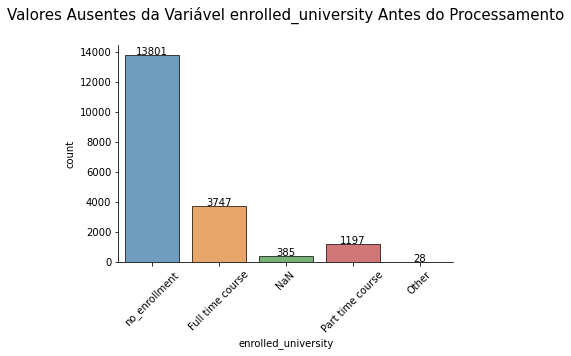

In [63]:
# Plot
sns.countplot(data = new_df.fillna('NaN'), x = 'enrolled_university', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks(rotation=45)
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável enrolled_university Antes do Processamento\n", fontsize = 15)
plt.show()

In [64]:
print('\nTotal de Valores Ausentes na Variável enrolled_university:', new_df['enrolled_university'].isna().sum())
print('\nProporção de Valores Ausentes na Variável education_level:')
new_df[new_df['enrolled_university'].isna()]['education_level'].value_counts(dropna = False)


Total de Valores Ausentes na Variável enrolled_university: 385

Proporção de Valores Ausentes na Variável education_level:


Graduate          170
NaN               100
Masters            53
High School        47
Primary School      9
Phd                 6
Name: education_level, dtype: int64

Candidatos com `Primary School` como `education_level` não estão qualificados para ingressar na universidade. Portanto, preencheremos valores `NaN` em `education_level` para `Primary Grad`.

In [65]:
# Prepara o índice
nan_index = (new_df[(new_df['enrolled_university'].isna()) & (new_df['education_level']=='Primary School')]).index

In [66]:
len(nan_index)

9

In [67]:
# Imputação de valores ausentes
new_df['enrolled_university'][nan_index] = 'Primary Grad'

In [68]:
print('Total de Valores Ausentes:', new_df['enrolled_university'].isna().sum())
new_df[new_df['enrolled_university'].isna()]['education_level'].value_counts(dropna = False)

Total de Valores Ausentes: 376


Graduate       170
NaN            100
Masters         53
High School     47
Phd              6
Name: education_level, dtype: int64

In [69]:
# Prepara o índice
nan_index = new_df[(new_df['enrolled_university'].isna())].index

In [70]:
# O restante colocamos como 'Other'
new_df['enrolled_university'][nan_index] = 'Other'

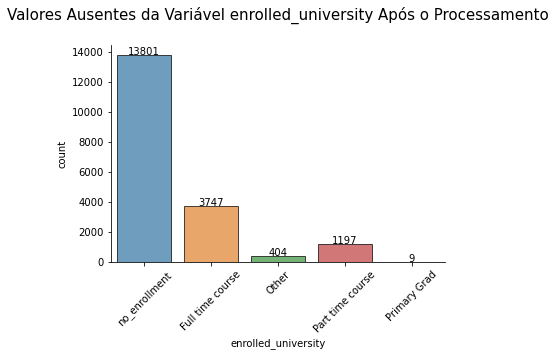

In [71]:
# Plot
sns.countplot(data = new_df.fillna('NaN'), x = 'enrolled_university', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks(rotation=45)
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável enrolled_university Após o Processamento\n", fontsize = 15)
plt.show()

In [72]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,21.0,no_enrollment,Has relevent experience,Graduate,NaN,STEM,1.0
1,0.776,15.0,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5.0,Full time course,No relevent experience,Graduate,NaN,STEM,0.0
3,0.789,1.0,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,21.0,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


#### Variável company_type

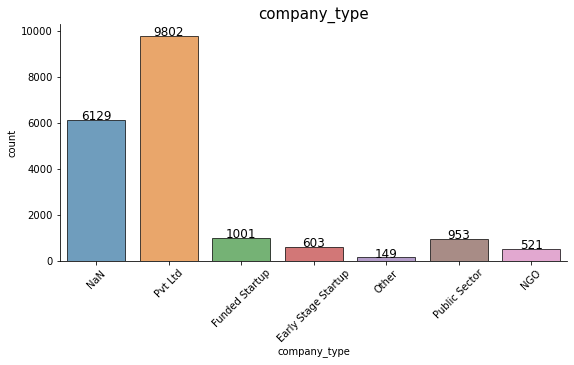

In [73]:
# Plot
plt.figure(figsize = (20, 20))
column_list = ['company_type']
A = 0
for i in column_list:
    A+=1
    plt.subplot(4,2,A)
    ax = sns.countplot(data = new_df.fillna('NaN'), x = i, alpha = 0.7, edgecolor = 'black')
    sns.despine() 
    plt.title(i, fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
    if A >=0:
        plt.xticks(rotation = 45)

In [74]:
new_df['company_type'].value_counts(dropna = False)

Pvt Ltd                9802
NaN                    6129
Funded Startup         1001
Public Sector           953
Early Stage Startup     603
NGO                     521
Other                   149
Name: company_type, dtype: int64

In [75]:
# Índice
nan_index = new_df[(new_df['company_type'].isna())].index

In [76]:
# Imputação dos valores NaN com 'Other'
new_df['company_type'][nan_index] = 'Other'

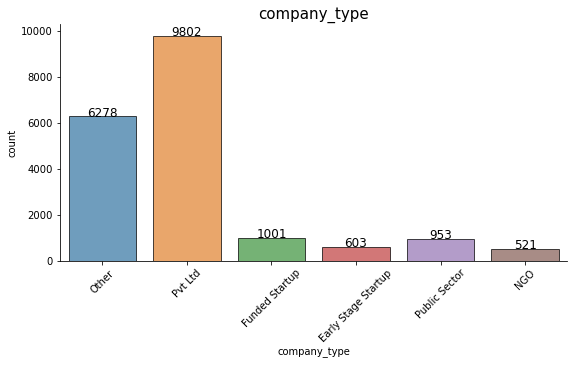

In [77]:
# Plot
plt.figure(figsize = (20, 20))
column_list = ['company_type']
A = 0
for i in column_list:
    A+=1
    plt.subplot(4,2,A)
    ax = sns.countplot(data = new_df.fillna('NaN'), x = i, alpha = 0.7, edgecolor = 'black')
    sns.despine() 
    plt.title(i, fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
    if A >=0:
        plt.xticks(rotation = 45)

In [78]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,21.0,no_enrollment,Has relevent experience,Graduate,Other,STEM,1.0
1,0.776,15.0,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5.0,Full time course,No relevent experience,Graduate,Other,STEM,0.0
3,0.789,1.0,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,21.0,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


#### Variável education_level

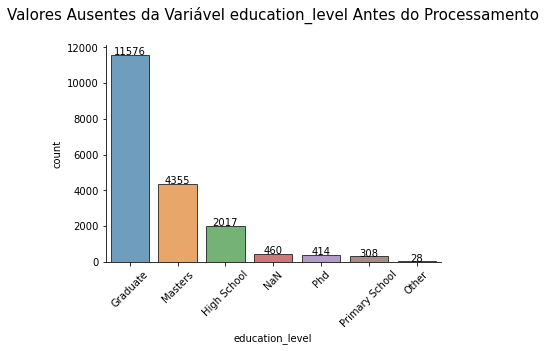

In [79]:
# Plot
sns.countplot(data = new_df.fillna('NaN'), x = 'education_level', alpha = 0.7, edgecolor = 'black')
plt.xticks(rotation = 45)
sns.despine()
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável education_level Antes do Processamento\n", fontsize = 15)
plt.show()

In [80]:
# Índice
nan_index = new_df[(new_df['education_level'].isna())].index

In [81]:
# Imputação dos valores NaN com 'Other'
new_df['education_level'][nan_index] = 'Other'

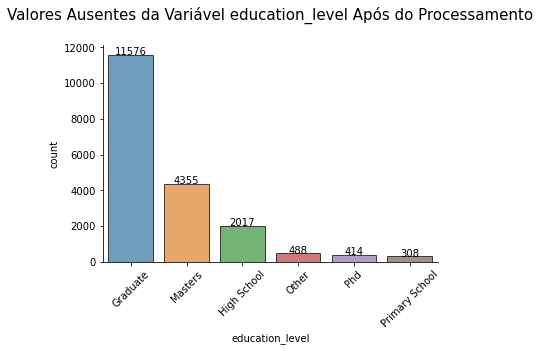

In [82]:
# Plot
sns.countplot(data = new_df.fillna('NaN'), x = 'education_level', alpha = 0.7, edgecolor = 'black')
plt.xticks(rotation = 45)
sns.despine()
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável education_level Após do Processamento\n", fontsize = 15)
plt.show()

In [83]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,21.0,no_enrollment,Has relevent experience,Graduate,Other,STEM,1.0
1,0.776,15.0,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5.0,Full time course,No relevent experience,Graduate,Other,STEM,0.0
3,0.789,1.0,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,21.0,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


#### Variável experience

In [84]:
new_df['experience'].value_counts(dropna=False)

21.0     3281
5.0      1427
4.0      1402
3.0      1351
6.0      1214
2.0      1124
1.0      1069
7.0      1028
10.0      982
9.0       980
8.0       802
15.0      685
11.0      664
14.0      586
16.0      506
12.0      494
13.0      399
17.0      342
19.0      304
18.0      279
20.0      148
NaN        63
Other      28
Name: experience, dtype: int64

In [85]:
# Percentual de valores ausentes

percent_missing = round((new_df.isnull().sum() / len(new_df) * 100).sort_values(ascending=False),2)
percent_missing 

experience                0.33
city_development_index    0.00
enrolled_university       0.00
relevent_experience       0.00
education_level           0.00
company_type              0.00
major_discipline          0.00
target                    0.00
dtype: float64

In [86]:
new_df['experience'].isnull().sum()

63

In [87]:
new_df.shape

(19158, 8)

In [88]:
new_df = new_df.dropna()

In [89]:
percent_missing = round((new_df.isnull().sum() / len(new_df) * 100).sort_values(ascending=False),2)
percent_missing 

city_development_index    0.0
experience                0.0
enrolled_university       0.0
relevent_experience       0.0
education_level           0.0
company_type              0.0
major_discipline          0.0
target                    0.0
dtype: float64

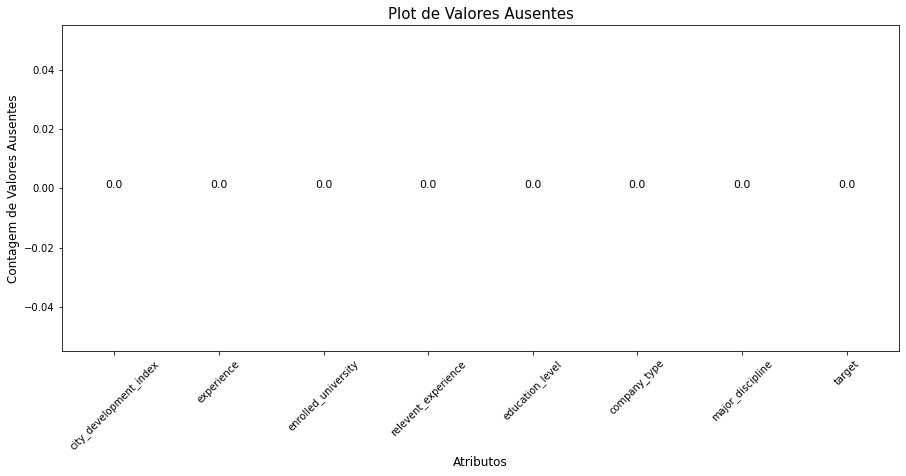

In [90]:
# Valores ausentes por coluna
null_df = new_df.isna().sum().reset_index()

# Figura
ax = plt.figure(figsize = (15,6))

# Barplot
ax = sns.barplot(null_df['index'], null_df[0], palette = 'husl')
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Plot de Valores Ausentes", fontsize = 15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()

### Ajustes Finais

In [91]:
# Ajustando os dados
new_df['enrolled_university'] = new_df['enrolled_university'].replace('no_enrollment', 'No enrollment')

## Relatório Final

Com base em nossa análise observamos que as variáveis mais relevantes para identificar um bom candidato são:

- Índice de Desenvolvimento da cidade onde mora o candidato.
- Tempo de experiência profissional.
- Se está ou não matriculado em um curso universitário.
- Se tem ou não experiência relevante.
- O nível educacional.
- O tipo de empresa que o candidato trabalhou ou trabalha atualmente.
- A especialização na graduação (quando for o caso).

Não são relevantes para a análise:

- O ID do candidato.
- O código da cidade do candidato.
- O gênero.
- A última vez que o candidato esteve empregado.
- O tamanho da empresa (quando for o caso).
- Total de horas de treimamento.


**Recomendações do Analista de Dados**:

- O RH pode desenvolver um método de coleta de dados para obter outros recursos a fim de melhorar a qualidade dos dados e tornar o trabalho de análise mais preciso.

- O RH pode procurar candidatos que vêm de cidades com índice de desenvolvimento urbano mais baixo, sem experiência relevante, nível de educação superior e menor experiência de trabalho para ter maior chance de encontrar candidatos que estão procurando um emprego.

- O RH pode tornar o treinamento mais compacto porque muitas pessoas não precisam de muito tempo para concluir o treinamento.